# Lecture 1 

Just to train some sci-kit learn supervisied model to ensure the environment is working

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
plt.rcParams["figure.figsize"] = [12, 4]

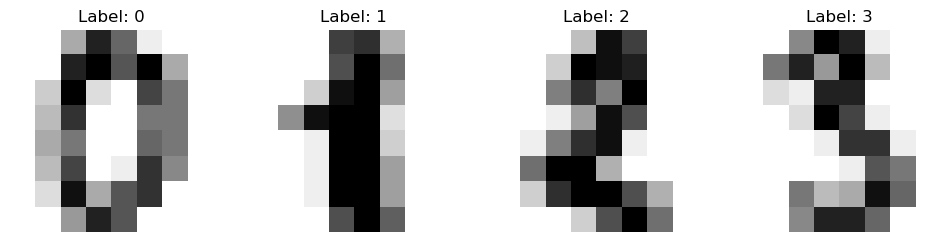

In [2]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# load the digits dataset
digits = datasets.load_digits()
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images.
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
 ax.set_axis_off()
 ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
 ax.set_title("Label: %i" % label)

In [3]:
np.random.seed(0)
# To apply a classifier on this data, we need to flatten the image, to
# turn the data into a (samples, feature) matrix:
data = digits.images.reshape((len(digits.images), -1))
n_samples = data.shape[0]
# create a small neural network model
from sklearn.model_selection import train_test_split # noqa E402
from sklearn.neural_network import MLPClassifier # noqa E402
classifier = MLPClassifier(alpha=1e-3)
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
 data, digits.target, test_size=0.5, shuffle=False
)
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

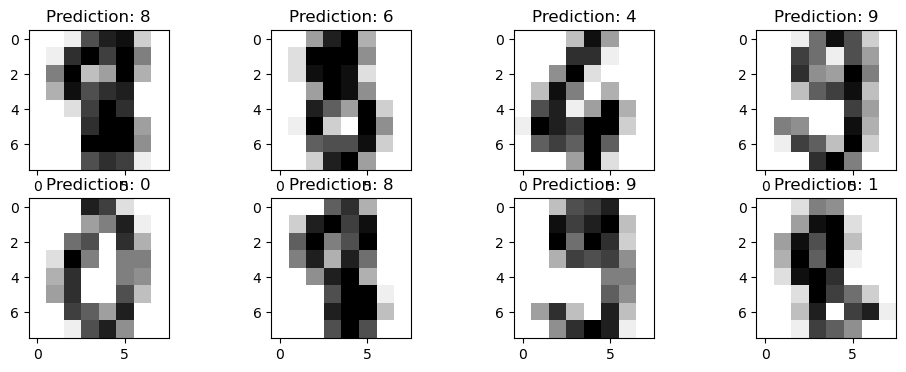

In [4]:
_, axes = plt.subplots(2, 4)
images_and_predictions = list(zip(digits.images[n_samples // 2 :], predicted))
for ax, (image, prediction) in zip(axes.flatten(), images_and_predictions[:8]):
 ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
 ax.set_title("Prediction: %i" % prediction)